# Part I 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis as NA

## Spread of HIV virus
The spread is described by a simple model which consists of a set of coupled ordinary differential equations. First, two methods to solve this set of ODEs are compared.

In [2]:
def forward_euler(f, y0, h, tmax):
    """Forward Euler method to solve ordinary differential equations. Given a starting point y0 and 
    function f such that Y = f(Y, Y', Y'',..., Y^(k)) and time step h\nReturns:\n
    Array Y=[Y(t0), Y(t0+h), ..., Y(tmax)]"""
    Y = np.empty(shape =(len(y0),tmax))
    Y[:,0] = y0
    for i in range(tmax-1):
        Y[:,i+1] = Y[:,i]+h*f(Y[:,i])
    return Y
def runge_kutta_4(f, y0, h, tmax):
    """Fourth order runge kutta method to solve ordinary differential equations. Given a starting point y0 and 
    function f such that Y = f(Y, Y', Y'',..., Y^(k)) and time step h\nReturns:\n
    Array Y=[Y(t0), Y(t0+h), ..., Y(tmax)]"""
    Y = np.empty(shape = (len(y0),tmax))
    Y[:,0] = y0
    for i in range(tmax-1):
        k1 = f(Y[:,i])
        k2 = f(Y[:,i] + h/2*k1)
        k3 = f(Y[:,i] + h/2*k2)
        k4 = f(Y[:,i] + h*k3)
        Y[:,i+1] = Y[:,i] + h/6*(k1+k2+k3+k4)
    return Y

In [3]:
def ODE_func(a, p, e, r):
    """Returns system of ODE's which describe the spread of HIV. Parameters a describe contacts, e describes
    blood transfusions and r the effects of death."""
    def ODE_funcx(x):
        F0 = a[0]*x[0]*(p[0]-x[0])+a[1]*x[1]*(p[0]-x[0])-r*x[0]
        F1 = a[2]*x[0]*(p[1]-x[1])+a[3]*x[1]*(p[1]-x[1])+a[4]*x[2]*(p[1]-x[1])-r*x[1]
        F2 = a[5]*x[1]*(p[2]-x[2])+a[6]*x[3]*(p[2]-x[2])-r*x[2]
        F3 = a[7]*x[2]*(p[3]-x[3])+e*x[0]*(r-x[3])-r*x[3]
        return np.array([F0, F1, F2, F3])
    return ODE_funcx

In [7]:
y0 = np.array([.01, 0,0,0])
#storing parameters a1, a2, b1, b2, b3, c1, c2, d1
a = np.array([10., 5, 5, 1, 1, 1, 1, 1])
#p contains the populations p1, p2, q and r
p = np.array([5., 5, 100, 100])
h, num_steps = 1e-6, 3000
Y_fe = forward_euler(ODE_func(a,p,0,0), y0, h, num_steps)/p[:,NA]*100
Y_rg = runge_kutta_4(ODE_func(a,p,0,0), y0, h, num_steps)/p[:,NA]*100

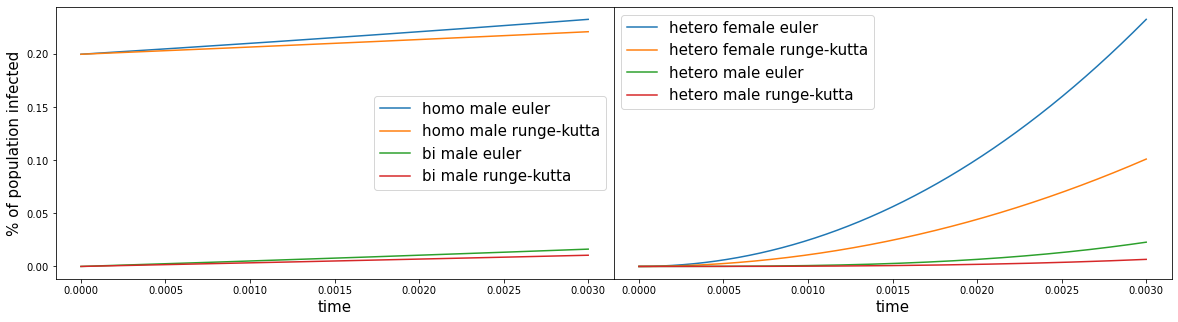

In [8]:
t = np.linspace(0,h*num_steps,num_steps)
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(t, Y_fe[0,:], label = "homo male euler")
ax[0].plot(t, Y_rg[0,:], label = "homo male runge-kutta")
ax[0].plot(t, Y_fe[1,:], label = "bi male euler")
ax[0].plot(t, Y_rg[1,:], label = "bi male runge-kutta")
ax[1].plot(t, Y_fe[2,:], label = "hetero female euler")
ax[1].plot(t, Y_rg[2,:], label = "hetero female runge-kutta")
ax[1].plot(t, Y_fe[3,:], label = "hetero male euler")
ax[1].plot(t, Y_rg[3,:], label = "hetero male runge-kutta")
ax[0].legend(fontsize = 15), ax[1].legend(fontsize = 15)
ax[0].set_xlabel("time", fontsize = 15), ax[1].set_xlabel("time", fontsize = 15)
ax[0].set_ylabel("% of population infected", fontsize = 15)
plt.subplots_adjust(wspace=0)
ax[1].set_yticks([])
plt.show()

In [6]:
e = np.logspace(-3,1,5)
Y_rg_bd = np.empty(shape = (len(y0), num_steps, len(e)))
for i in range(len(e)):
    Y_rg_bd[:,:,i] = runge_kutta_4(ODE_func(a,p,e[i],0), y0, h, num_steps)/p[:,NA]*100

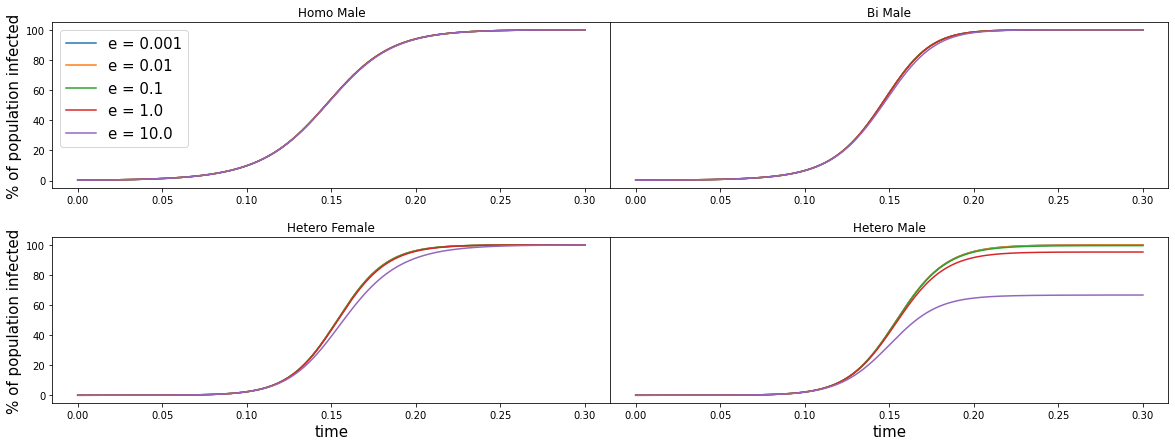

In [7]:
t = np.linspace(0,h*num_steps,num_steps)
fig, ax = plt.subplots(2,2, figsize = (20,7))
for i in range(len(e)):
    ax[0,0].plot(t, Y_rg_bd[0,:,i], label = "e = {}".format(e[i]))
    ax[0,0].legend(fontsize = 15), ax[0,0].set_title("Homo Male")
    ax[0,1].plot(t, Y_rg_bd[1,:,i]),  ax[0,1].set_title("Bi Male")
    ax[1,0].plot(t, Y_rg_bd[2,:,i]),  ax[1,0].set_title("Hetero Female")
    ax[1,1].plot(t, Y_rg_bd[3,:,i]), ax[1,1].set_title("Hetero Male")
ax[0,1].set_yticks([]), ax[1,1].set_yticks([])
ax[1,0].set_xlabel("time",fontsize=15), ax[1,1].set_xlabel("time",fontsize = 15),
plt.subplots_adjust(hspace=.3),plt.subplots_adjust(wspace=0)
ax[0,0].set_ylabel("% of population infected", fontsize = 15)
ax[1,0].set_ylabel("% of population infected", fontsize = 15)
plt.show()

In [8]:
num_steps = 3000
h = 1e-4
r = np.linspace(.005,10,5)
Y_rg_r = np.empty(shape = (len(y0), num_steps, len(r)))
for i in range(len(r)):
    Y_rg_r[:,:,i] = runge_kutta_4(ODE_func(a,p,0,r[i]), y0, h, num_steps)/p[:,NA]*100

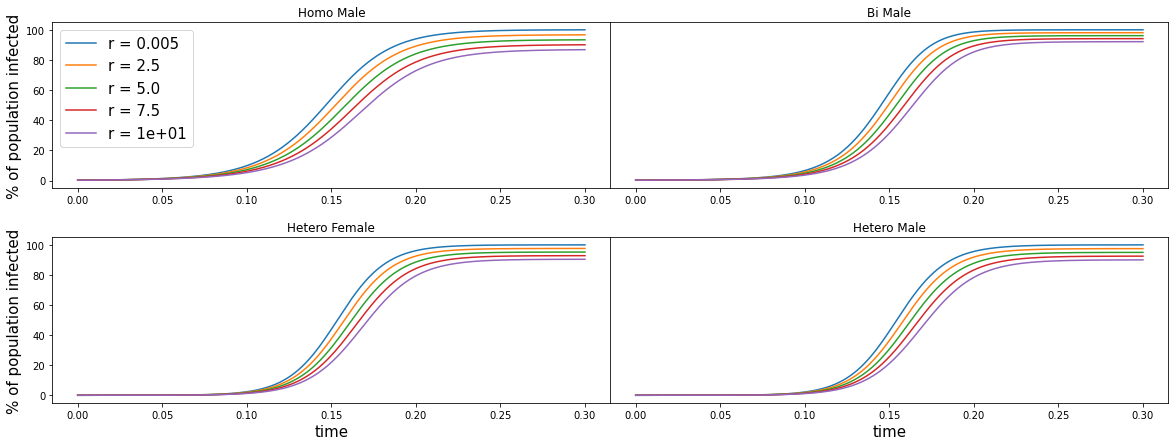

In [9]:
fig, ax = plt.subplots(2,2, figsize = (20,7))
for i in range(len(r)):
    ax[0,0].plot(t, Y_rg_r[0,:,i], label = "r = {:3.2}".format(r[i]))
    ax[0,0].legend(fontsize = 15), ax[0,0].set_title("Homo Male")
    ax[0,1].plot(t, Y_rg_r[1,:,i]),  ax[0,1].set_title("Bi Male")
    ax[1,0].plot(t, Y_rg_r[2,:,i]),  ax[1,0].set_title("Hetero Female")
    ax[1,1].plot(t, Y_rg_r[3,:,i]), ax[1,1].set_title("Hetero Male")
ax[0,1].set_yticks([]), ax[1,1].set_yticks([])
ax[1,0].set_xlabel("time",fontsize=15), ax[1,1].set_xlabel("time",fontsize = 15),
plt.subplots_adjust(hspace=.3),plt.subplots_adjust(wspace=0)
ax[0,0].set_ylabel("% of population infected", fontsize = 15)
ax[1,0].set_ylabel("% of population infected", fontsize = 15)
plt.show()

In [10]:
e = np.logspace(-3,1,40)
r = np.logspace(-3,1,40)
Y_rg_r = np.empty(shape = (len(y0), num_steps, len(r), len(e)))
for i in range(len(r)):
    for j in range(len(e)):
        Y_rg_r[:,:,i,j] = runge_kutta_4(ODE_func(a,p,e[i],r[j]), y0, h, num_steps)/p[:,NA]*100

KeyboardInterrupt: 

## compute for group 0 

In [14]:
rr,ee = np.meshgrid(r,e)

NameError: name 'rr' is not defined

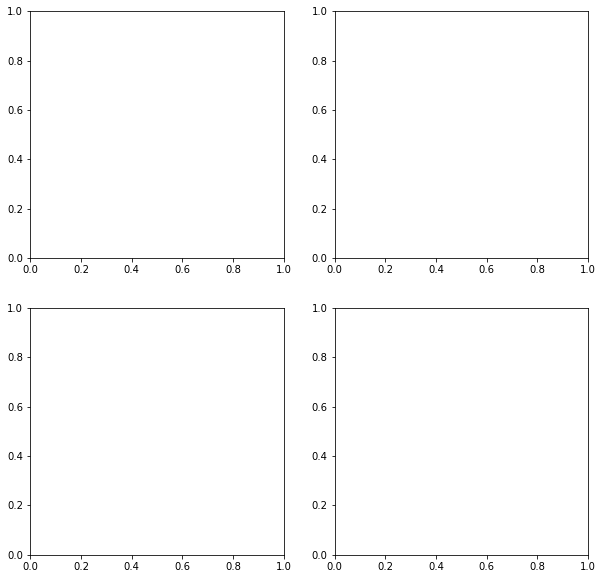

In [179]:
Plot_array = np.argmax(Y_rg_r>=.99, axis=1)
fig, ax = plt.subplots(2,2, figsize = (10,10))
for i in range(2):
    for j in range(2):
        CS = ax[i,j].contourf(rr,ee,Plot_array[2*i+j])
        ax[i,j].clabel(CS, inline=1, fontsize=10)
        #ax[i,j].set_xticks(np.arange(0,len(r),2))
        #ax[i,j].set_xticklabels(np.round(r[::2], decimals= 3))
        #ax[i,j].set_xlabel("r"), ax[i,j].set_ylabel("e")
        #ax[i,j].set_yticks(np.arange(0,len(e),2))
        #ax[i,j].set_yticklabels(np.round(e[::2], decimals= 3))
        


# Part II 

In [45]:
T, ds = 200, .5
dt = ds**2/50 
NT= int(T/dt)
C, K, Dp, Dq  = 4.5, 9, 1 ,8
l = int(40/ds)
#define the square
a, b = int(10/ds), int(30/ds)
p = np.empty(shape = (NT,l, l))
p[0,:,:] = 0
q = np.copy(p)
p[0,a:b,a:b] = C + 0.1
q[0,a:b,a:b] = K/C + 0.2

In [46]:
def Laplace(u):
    return np.roll(u,-1,0)+np.roll(u,1,0)-4*u+np.roll(u,-1,1)+np.roll(u,1,1)

In [47]:
def create_func(C, K, Dp, Dq):
    def compute_time_step(dt, ds, k, p,q):
        p[k+1] = dt*(Dp/ds**2*Laplace(p[k])+p[k]**2*q[k]+C-(K+1)*p[k])+p[k]
        q[k+1] = dt*(Dq/ds**2*Laplace(q[k])-p[k]**2*q[k]+K*p[k])+q[k]
        return p, q
    return compute_time_step

In [48]:
compute_time_step = create_func(C,K, Dp, Dq)

In [49]:
for t in range(NT):
    p[t,[0, l-1],:] = p[t,[1,l-2],:]
    p[t,:,[0,l-1]] = p[t,:,[1,l-2]]
    
    q[t,[0, l-1],:] = q[t,[1,l-2],:]
    q[t,:,[0,l-1]] = q[t,:,[1,l-2]]
    p,q = compute_time_step(dt,ds,t,p,q)

IndexError: index 40000 is out of bounds for axis 0 with size 40000

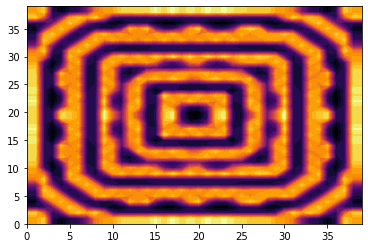

In [32]:
from IPython.display import HTML
import matplotlib.animation as animation
x = np.arange(l)
y = np.arange(l)
xx,yy = np.meshgrid(x,y)
fig, ax = plt.subplots()

ax.set_xlim((0, 40))
ax.set_ylim((0, 40))

def animate(i): 
    ax.clear()
    z = p[i,:,:]
    ax.contourf(xx, yy,z, 25, cmap=plt.cm.inferno)

anim = animation.FuncAnimation(fig, animate, frames=600, interval=30)
HTML(anim.to_html5_video())